In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# Load Packages
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [6]:
data = pd.read_csv('/Users/ameyadalvi/Downloads/T2D_abundance.csv', delimiter = '\t', index_col = None)
data.head()

,Unnamed: 0,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [7]:
data.rename( columns={'Unnamed: 0':'Index'}, inplace=True )
data.head()

,Index,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [8]:
data.set_index('Index')
data.head()

,Index,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [9]:
data.shape

(344, 574)

In [10]:
data.head()

,Index,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
0,con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
1,con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
2,con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
3,con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
4,con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Columns: 574 entries, Index to Class
dtypes: float64(572), object(2)
memory usage: 1.5+ MB


In [12]:
data.isnull().sum().head()

Index                                                                                                                                                   0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii         0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified    0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae              0
k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified                               0
dtype: int64

In [13]:
features = data.columns

In [14]:
for col in features:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [15]:
data.isnull().sum().head()

Index                                                                                                                                                   0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii         0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified    0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae              0
k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified                               0
dtype: int64

In [16]:
y = data['Class']

X = data.drop(['Index','Class'], axis=1)

In [17]:
pca = PCA()
df_pca = pca.fit_transform(X=X)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)  #> (3147, 784)
df_pca.round(2).head()

(344, 344)


,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
0,-2.94,-2.25,-3.92,0.36,-1.50,-0.27,-0.99,0.13,-3.37,-0.59,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
1,-7.22,1.84,-3.77,0.43,-4.48,-8.59,-10.56,4.00,5.92,-3.72,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
2,24.05,-4.85,7.81,3.01,-1.61,-2.17,-3.40,-1.56,-1.17,-5.71,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
3,-8.68,6.43,-2.30,-1.57,-3.40,1.28,1.03,-3.25,-0.54,7.00,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
4,2.57,-3.97,-5.16,2.77,0.66,-2.74,-4.14,0.29,0.44,-1.97,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0


In [18]:
pca.explained_variance_ratio_.round(8)

array([2.9922075e-01, 6.9360470e-02, 5.8252530e-02, 4.8079230e-02,
       4.1775380e-02, 3.6900240e-02, 3.3858260e-02, 2.8948360e-02,
       2.8025600e-02, 2.5544680e-02, 2.2907240e-02, 2.1318400e-02,
       1.8287030e-02, 1.7078170e-02, 1.5696740e-02, 1.5346120e-02,
       1.3858700e-02, 1.3355810e-02, 1.2685390e-02, 1.2035280e-02,
       1.1211440e-02, 1.0340040e-02, 9.2943200e-03, 8.4687800e-03,
       8.3524500e-03, 8.0379300e-03, 7.1091900e-03, 6.8466900e-03,
       6.1682900e-03, 5.7214800e-03, 5.6108400e-03, 4.7267800e-03,
       4.3502500e-03, 3.9745600e-03, 3.8903700e-03, 3.5114900e-03,
       3.4411800e-03, 3.2308400e-03, 3.0673200e-03, 2.7418100e-03,
       2.5886000e-03, 2.4480600e-03, 2.2551900e-03, 2.0600100e-03,
       1.9748100e-03, 1.8650300e-03, 1.6916600e-03, 1.5849800e-03,
       1.5550100e-03, 1.4735700e-03, 1.3664400e-03, 1.3003700e-03,
       1.2173400e-03, 1.1547700e-03, 1.1341800e-03, 1.0700700e-03,
       9.9103000e-04, 9.7068000e-04, 9.5689000e-04, 9.2234000e

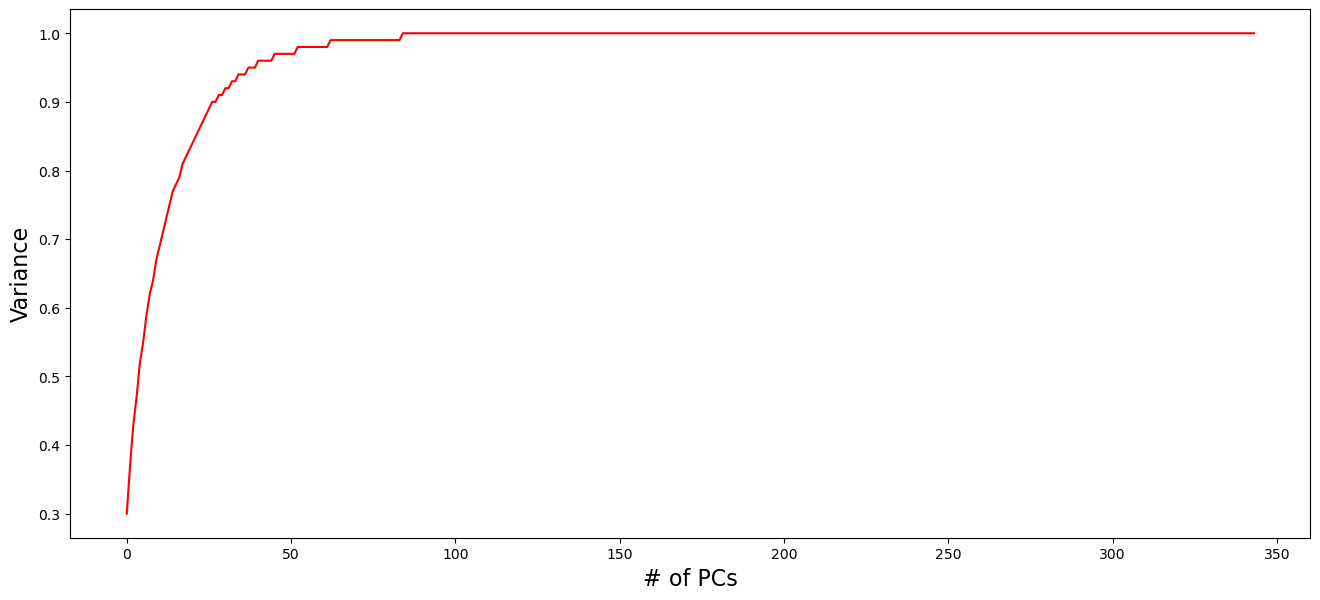

In [19]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='red')
plt.xlabel('# of PCs', fontsize=16)
plt.ylabel('Variance', fontsize=16)
plt.show()

In [20]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 95% of variance is',dim)

The number of dimensions required to preserve 95% of variance is 40


Code below is refered from: https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

In [21]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

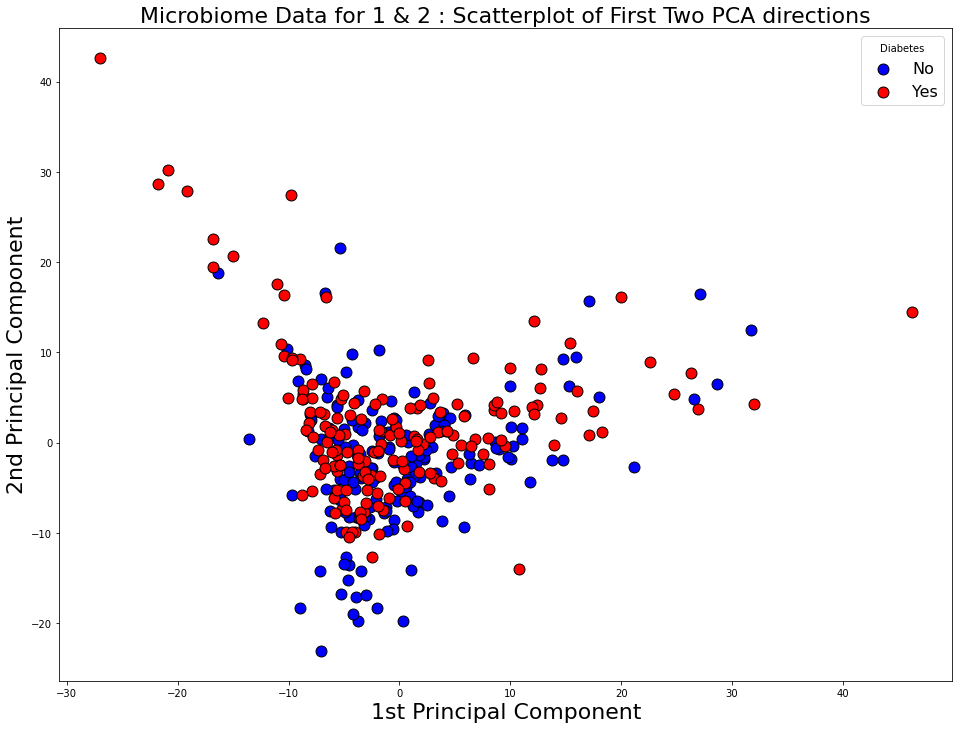

In [22]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = y=='n';
rows_1 = y=='t2d'; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='No')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='Yes')

# # Encircle the boundaries
# encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
# encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)

# # Shading
# encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
# encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)

# Labels
ax.set_title("Microbiome Data for 1 & 2 : Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='upper right', title='Diabetes', fontsize=16)
plt.show();

In [23]:
data['TypeClass'] = data['Class'].rank(method='dense').astype(int)

In [24]:
np.random.seed(4)
rndperm = np.random.permutation(data.shape[0])

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
X = data.drop(['Index','Class'], axis = 1)
features = X.columns

In [27]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data[features].values)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]


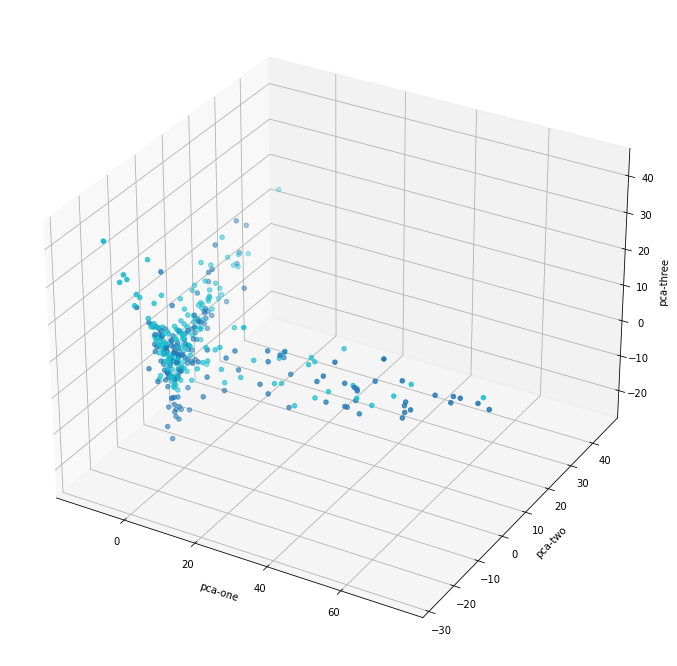

In [28]:
# 3-D Scatterplot against PC1, PC2 and PC3
ax = plt.figure(figsize=(16,12)).gca(projection='3d')

# Row masks for each category
rows_0 = y=='n';
rows_1 = y=='t2d'; 

ax.scatter(
    xs=data.loc[rndperm,:]["pca-one"], 
    ys=data.loc[rndperm,:]["pca-two"], 
    zs=data.loc[rndperm,:]["pca-three"], 
    c=data.loc[rndperm,:]["TypeClass"], 
    cmap='tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show();

# t-SNE implementation:

In [29]:
data_subset = data[features].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.29915773 0.06934487 0.05825325]


In [30]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne_results = pd.DataFrame(tsne_results)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 344 samples in 0.000s...
[t-SNE] Computed neighbors for 344 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 344 / 344
[t-SNE] Mean sigma: 9.304433
[t-SNE] KL divergence after 250 iterations with early exaggeration: 127.320442
[t-SNE] KL divergence after 300 iterations: 3.684749


,0,1,2
0,-4.478605,158.425735,-98.176506
1,-16.860151,-12.616049,13.973678
2,-28.829153,5.156315,7.144454
3,211.408173,216.128616,-26.954027
4,14.154052,9.422039,-32.146248
...,...,...,...
339,-8.604441,-6.154282,-21.403168
340,-2.742371,-8.415710,-17.709576
341,-8.121204,16.610224,15.200628
342,-9.356997,-8.012743,-8.449434


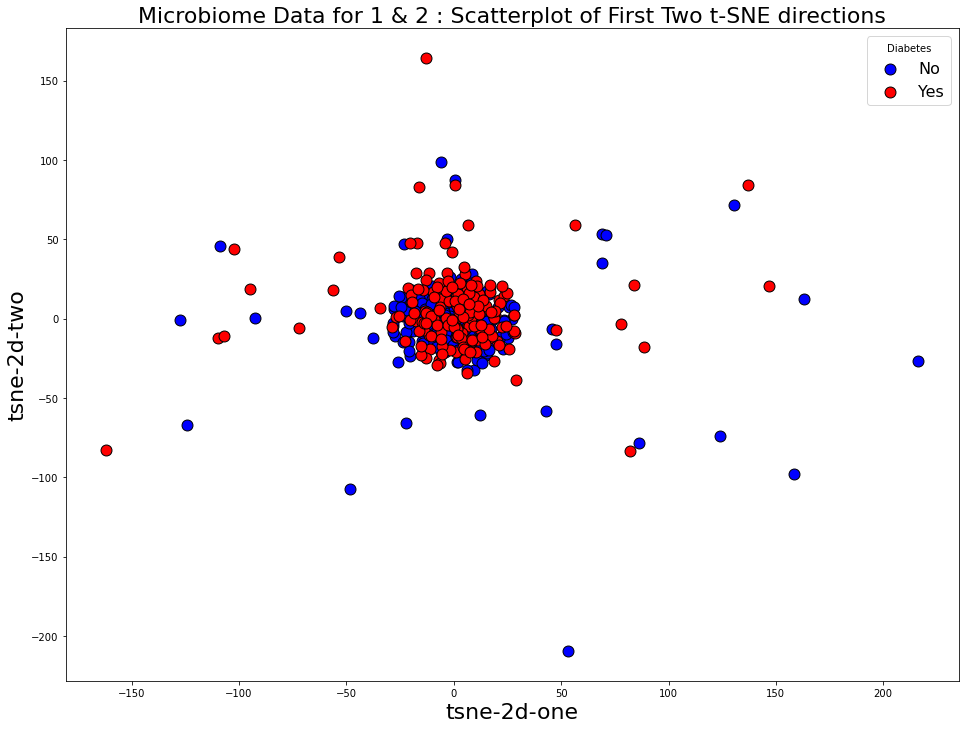

In [31]:
fig, ax = plt.subplots(1,1, figsize=(16,12))

rows_0 = y=='n';
rows_1 = y=='t2d'; 

# Plot
ax.scatter(tsne_results.loc[rows_0.tolist(), 1], tsne_results.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='No')
ax.scatter(tsne_results.loc[rows_1.tolist(), 1], tsne_results.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='Yes')

# data['tsne-2d-one'] = tsne_results[:,0]
# data['tsne-2d-two'] = tsne_results[:,1]

ax.set_title("Microbiome Data for 1 & 2 : Scatterplot of First Two t-SNE directions", fontsize=22)
ax.set_xlabel("tsne-2d-one", fontsize=22)
ax.set_ylabel("tsne-2d-two", fontsize=22)
ax.legend(loc='upper right', title='Diabetes', fontsize=16)
plt.show();

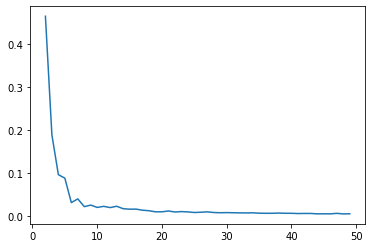

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

deltas = []
for N in range(2,50,1):
    P = [np.random.randint(-100, 100, N) for _ in range(500)]
    Q = np.random.randint(-100,100,N)
    diffs = [np.linalg.norm(p-Q) for p in P]
    mxd = max(diffs)
    mnd = min(diffs)
    delta = math.log10(mxd-mnd)/mnd
    deltas.append( delta )

plt.plot(range(2,50,1),deltas)
plt.show()